In [ ]:
######### Amazon Reviews Extraction ###########

import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...
# used to scrap specific content
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# creating empty reviews list
flipkart_reviews=[]

In [ ]:
##this code worked for AMAZON PRODUCT REVIEW
##AMAZON HAS SOME ISSUES IN READING THE HEADERS AND RESPONSES
# Get the first 20 pages of the review by populating the page numbers in the URL
#for i in range(1,1):
  #ip=[]
  ##url="https://www.amazon.in/Prestige-Electric-Kettle-PKOSS-1500watts/product-reviews/B01MQZ7J8K/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  #url="https://www.amazon.in/Prestige-Electric-Kettle-PKOSS-1500watts/product-reviews/B01MQZ7J8K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  #url="https://www.amazon.in/LifeLong-EK02-Litre-Electric-Kettle/product-reviews/B071WKFZRW/ref=cm_cr_arp_d_viewpnt_rgt?pageNumber=1&filterByStar=critical"
  #url="https://www.amazon.in/LifeLong-EK02-Litre-Electric-Kettle/product-reviews/B071WKFZRW/ref=cm_cr_arp_d_paging_btm_next_2?pageNumber="+str(i)
##changed the URL to FLIPKART product review
url = "https://www.amazon.in/OnePlus-Nord-Chromatic-128GB-Storage/product-reviews/B0BY8MCQ9S"
response = requests.get(url)

In [ ]:
requests.get(url)

<Response [503]>

In [ ]:
# creating soup object to iterate over the extracted content
soup = bs(response.content,"html.parser")
# Extracting the content under specific tags
# reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
reviews = soup.findAll('div',class_="a-row a-spacing-top-mini")
reviews

[<div class="a-row a-spacing-top-mini"><span class="a-size-base">Alrighty firstly I am impressed with "One Plus" 1+ aesthetic , so happy I am using this product. I play genshin impact on it , smooth ,love thiss phone. I love this phone , very happy. Nice and smooth graphics. The design is very good , easy to carry , strong phone. I will buy 1+ again in future. The only problem is the front camera pictures are not super good if you are into photography then it's not recommended, otherwise this phone rocks. Also i forgot , amazing battery and charging super fast. I love the 80% battery saver system where it does not exceed 80% when overcharging ,it saves your battery life.</span></div>,
 <div class="a-row a-spacing-top-mini"><span class="a-size-base">Good camera quality.best display value for money.....💫</span></div>]

In [ ]:
ip=[]
for i in range(len(reviews)):
    ip.append(reviews[i].text)
  # adding the reviews of one page to empty list which in future contains all the reviews
flipkart_reviews=flipkart_reviews+ip

In [ ]:
# writng reviews in a text file
with open("flipkartrev.txt","w",encoding='utf8') as output:
    output.write(str(flipkart_reviews))

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Joinining all the reviews into single paragraph
ip_rev_string = " ".join(flipkart_reviews)
ip_rev_string

'Alrighty firstly I am impressed with "One Plus" 1+ aesthetic , so happy I am using this product. I play genshin impact on it , smooth ,love thiss phone. I love this phone , very happy. Nice and smooth graphics. The design is very good , easy to carry , strong phone. I will buy 1+ again in future. The only problem is the front camera pictures are not super good if you are into photography then it\'s not recommended, otherwise this phone rocks. Also i forgot , amazing battery and charging super fast. I love the 80% battery saver system where it does not exceed 80% when overcharging ,it saves your battery life. Good camera quality.best display value for money.....💫'

In [ ]:
import nltk

In [ ]:
# Removing unwanted symbols and numbers incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [ ]:
ip_reviews_words = ip_rev_string.split(" ")
ip_reviews_words

['alrighty',
 'firstly',
 'i',
 'am',
 'impressed',
 'with',
 'one',
 'plus',
 'aesthetic',
 'so',
 'happy',
 'i',
 'am',
 'using',
 'this',
 'product',
 'i',
 'play',
 'genshin',
 'impact',
 'on',
 'it',
 'smooth',
 'love',
 'thiss',
 'phone',
 'i',
 'love',
 'this',
 'phone',
 'very',
 'happy',
 'nice',
 'and',
 'smooth',
 'graphics',
 'the',
 'design',
 'is',
 'very',
 'good',
 'easy',
 'to',
 'carry',
 'strong',
 'phone',
 'i',
 'will',
 'buy',
 'again',
 'in',
 'future',
 'the',
 'only',
 'problem',
 'is',
 'the',
 'front',
 'camera',
 'pictures',
 'are',
 'not',
 'super',
 'good',
 'if',
 'you',
 'are',
 'into',
 'photography',
 'then',
 'it',
 's',
 'not',
 'recommended',
 'otherwise',
 'this',
 'phone',
 'rocks',
 'also',
 'i',
 'forgot',
 'amazing',
 'battery',
 'and',
 'charging',
 'super',
 'fast',
 'i',
 'love',
 'the',
 'battery',
 'saver',
 'system',
 'where',
 'it',
 'does',
 'not',
 'exceed',
 'when',
 'overcharging',
 'it',
 'saves',
 'your',
 'battery',
 'life',
 'goo

In [ ]:
len(ip_reviews_words)

114

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set up stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Adding custom stopwords
additional_stopwords = ["product", "phone", "day", "price"]
stop_words.update(additional_stopwords)  # Use 'update' instead of 'extend'

In [ ]:
# Remove all the stop words from the review
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

In [ ]:
ip_reviews_words

['alrighty',
 'firstly',
 'impressed',
 'one',
 'plus',
 'aesthetic',
 'happy',
 'using',
 'play',
 'genshin',
 'impact',
 'smooth',
 'love',
 'thiss',
 'love',
 'happy',
 'nice',
 'smooth',
 'graphics',
 'design',
 'easy',
 'carry',
 'strong',
 'buy',
 'future',
 'problem',
 'front',
 'camera',
 'pictures',
 'super',
 'photography',
 'recommended',
 'otherwise',
 'rocks',
 'also',
 'forgot',
 'amazing',
 'battery',
 'charging',
 'super',
 'fast',
 'love',
 'battery',
 'saver',
 'system',
 'exceed',
 'overcharging',
 'saves',
 'battery',
 'life',
 'camera',
 'quality',
 'best',
 'display',
 'value',
 'money',
 '']

In [ ]:
ip_rev_string = " ".join(ip_reviews_words)
ip_rev_string

'alrighty firstly impressed one plus aesthetic happy using play genshin impact smooth love thiss love happy nice smooth graphics design easy carry strong buy future problem front camera pictures super photography recommended otherwise rocks also forgot amazing battery charging super fast love battery saver system exceed overcharging saves battery life camera quality best display value money '

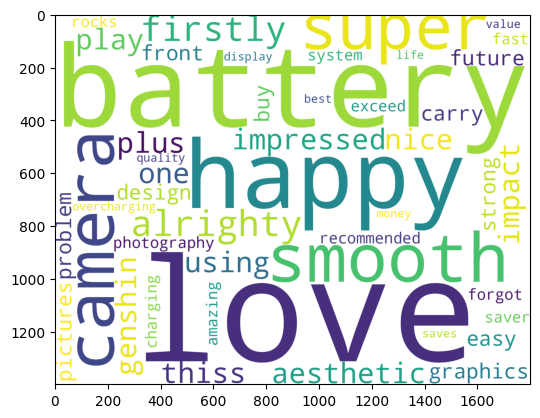

In [ ]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [ ]:
nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

poswords = list(opinion_lexicon.positive())

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
# Positive word cloud
# Choosing from the review only the words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

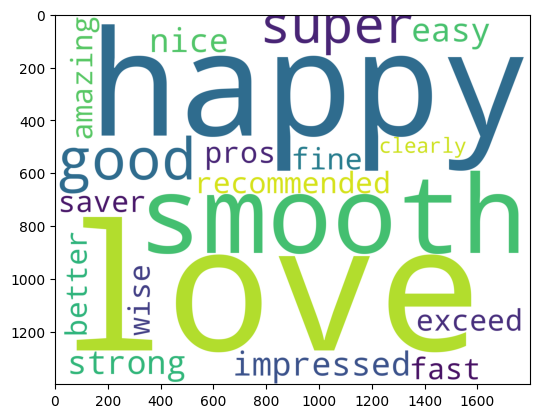

In [ ]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [ ]:
negwords = list(opinion_lexicon.negative())
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

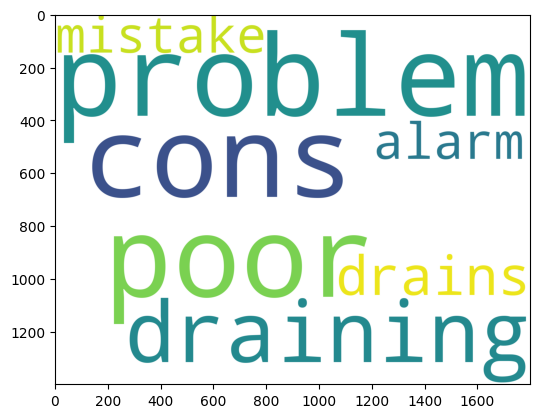

In [ ]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(2)
plt.imshow(wordcloud_neg_in_neg)